In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('seattle-weather.csv')

In [7]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


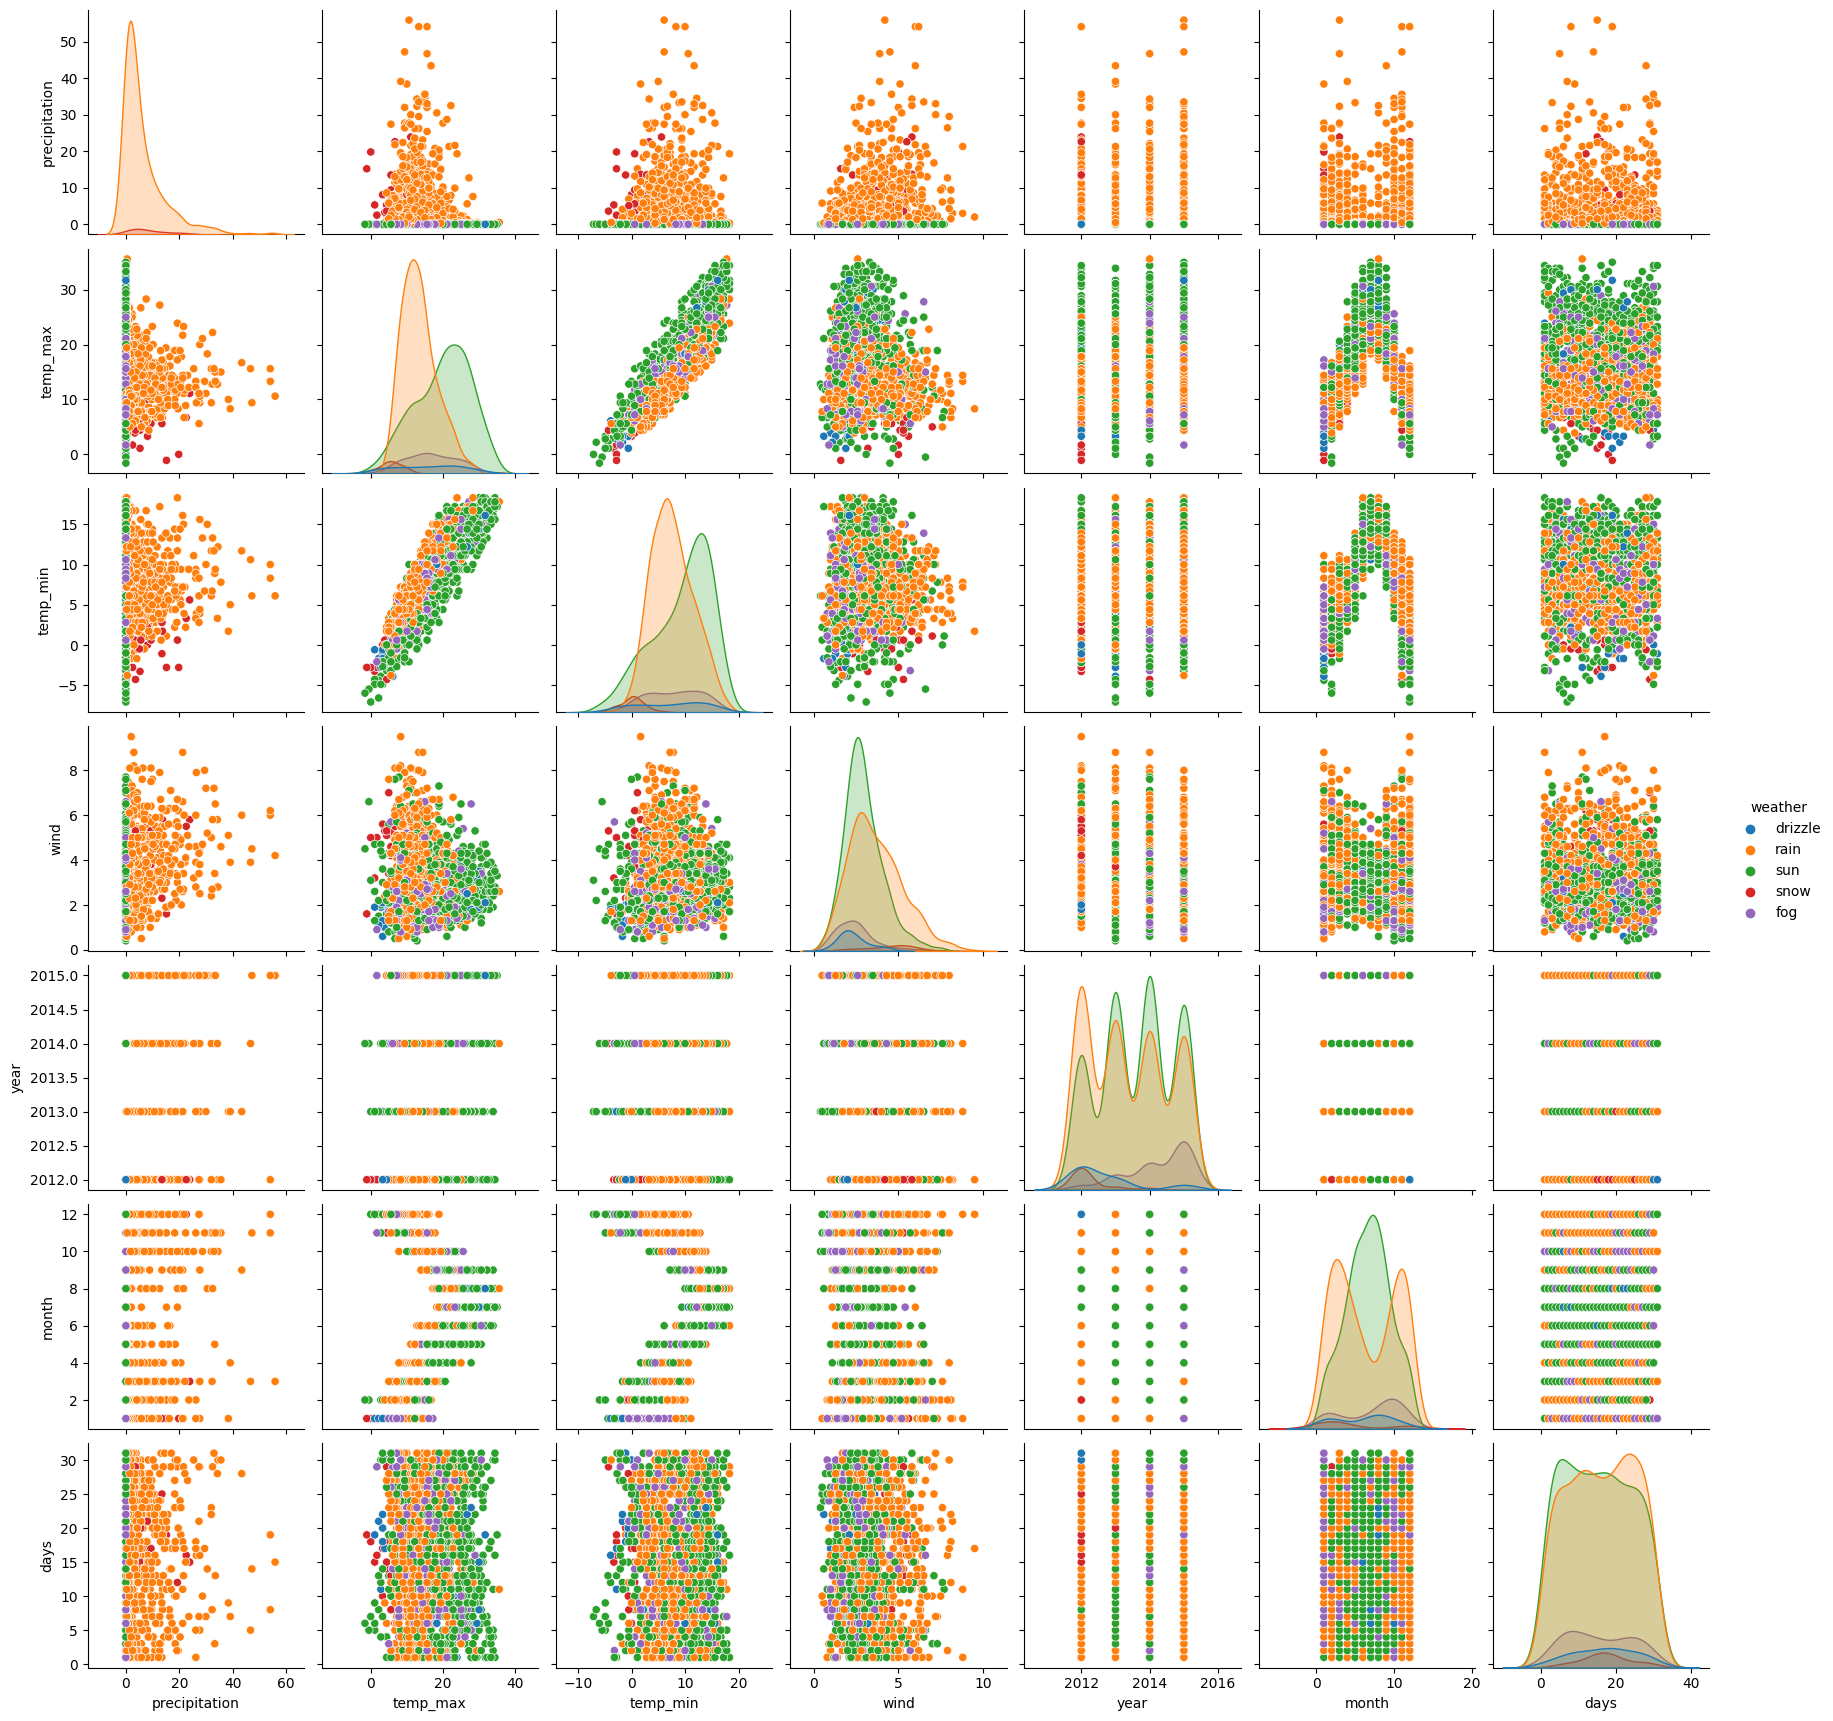

In [123]:
sns.pairplot(df, hue = "weather")

In [32]:
df.groupby(df['weather']).mean()

C:\Users\Oloye\AppData\Local\Temp\ipykernel_7140\929052952.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['weather']).mean()


,precipitation,temp_max,temp_min,wind,year,month,days
weather,,,,,,,
drizzle,0.000000,15.926415,7.111321,2.367925,2012.679245,6.000000,16.679245
fog,0.000000,16.757426,7.979208,2.481188,2014.257426,7.059406,15.514851
rain,6.557878,13.454602,7.588768,3.669891,2013.382215,6.413417,16.079563
snow,8.553846,5.573077,0.146154,4.411538,2012.269231,4.653846,17.346154
sun,0.000000,19.861875,9.343750,2.956406,2013.614063,6.667187,15.268750


In [15]:
df["date"] = pd.to_datetime(df["date"])

In [28]:
df['weather'].count

<bound method Series.count of 0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object>

In [23]:
df['days'] = df["date"].dt.day

In [33]:
from sklearn.preprocessing import LabelEncoder

In [52]:
y = df["weather"]
label = LabelEncoder()

In [60]:
z = label.fit_transform(y)

In [71]:
X = df.drop(["weather", "date"], axis=1)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
from sklearn.model_selection import train_test_split

In [96]:
from sklearn.ensemble import RandomForestClassifier
rtc = RandomForestClassifier()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.3,shuffle=True, random_state=101)

In [116]:
rtc.fit(X_train,y_train)

RandomForestClassifier()

In [117]:
pred = rtc.predict(X_test)

In [121]:
confusion_matrix(y_test, pred)

array([[  2,   0,   1,   0,  14],
       [  0,   5,   0,   0,  27],
       [  0,   0, 179,   1,  14],
       [  0,   0,   3,   3,   0],
       [  3,   3,   1,   0, 183]], dtype=int64)

In [104]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.40      0.12      0.18        17
           1       0.75      0.09      0.17        32
           2       0.97      0.92      0.94       194
           3       1.00      0.50      0.67         6
           4       0.76      0.97      0.86       190

    accuracy                           0.85       439
   macro avg       0.78      0.52      0.56       439
weighted avg       0.84      0.85      0.82       439



In [115]:
input_data =(0.0,20.6,8.3,2.2,2013,4,26)
input_data_array = np.asarray(input_data)
input_reshape = input_data_array.reshape(1,-1)
prediction = rtc.predict(input_reshape)
print(prediction)

[1]


c:\Users\Oloye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
